# Imports and files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = "/content/drive/MyDrive/SCORE - VR vision/Results"
slotsDf = pd.read_csv(os.path.join(path, "clean-data/slots.csv"))
participantsDf = pd.read_csv(os.path.join(path, "clean-data/participants.csv"))
focusTimesDf = pd.read_csv(os.path.join(path, "clean-data/focusTimes.csv"))
expDf = pd.read_csv(os.path.join(path, "clean-data/experiments.csv"))
scoresDf = pd.read_csv(os.path.join(path, "computed-data/scores.csv"))

In [4]:
expDf = (expDf
  .set_index(["participantId","device","datasetId"])
  .join(
      scoresDf
      .set_index(["participantId","device","datasetId"])
  )
  .reset_index())

In [5]:
order =[]
for i in expDf['experimentOrder']:
  if (i ==1) | (i==3):
    order.append(1)
  else:
    order.append(2)
expDf['sequenceOrder']=order

In [6]:
sns.set_context("poster", 0.7)
sns.set_style("whitegrid")

# Comparing the scores with respect to experiment order

## True proportion

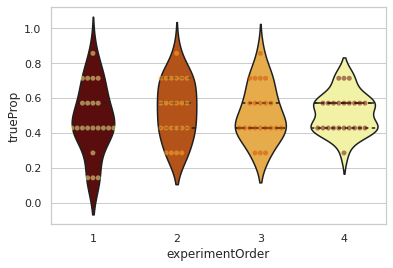

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x='experimentOrder', y='trueProp', data=expDf, inner='quartiles', palette="afmhot")
ax = sns.swarmplot(x='experimentOrder', y='trueProp', data=expDf, palette="afmhot_r", edgecolor="grey", alpha=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


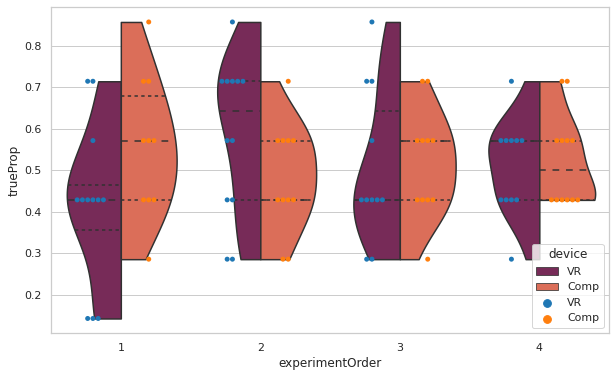

In [ ]:
plt.figure(figsize = (10,6))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x='experimentOrder', y='trueProp', hue='device', split=True, palette="rocket", data=expDf,inner='quartiles', cut=0)
ax = sns.swarmplot(x='experimentOrder', y='trueProp', hue='device', data=expDf, split=True, palette="tab10", edgecolor="grey")

## Maximum True streak

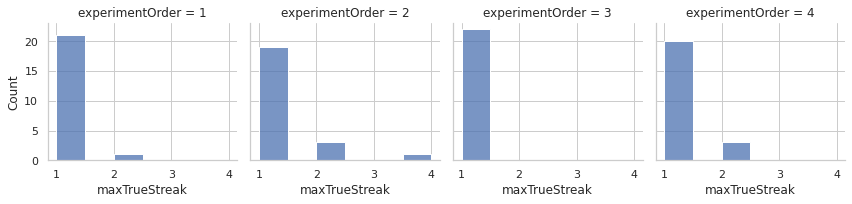

In [ ]:
sns.displot(
    expDf, x="maxTrueStreak", col="experimentOrder",
    binwidth=0.5, height=3, facet_kws=dict(margin_titles=True),
)

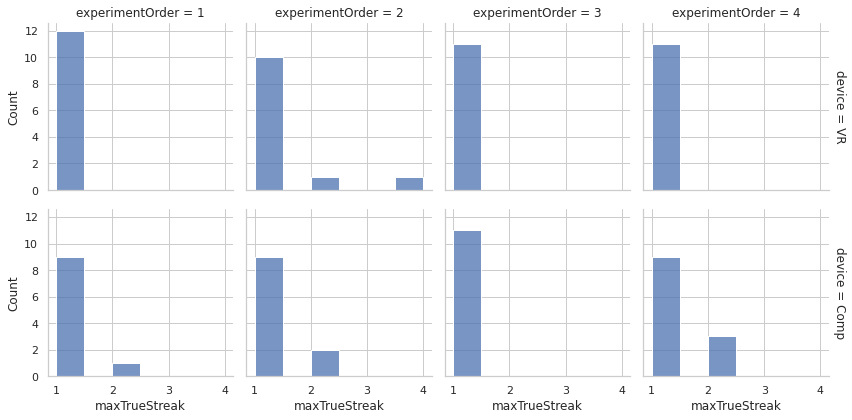

In [ ]:
sns.displot(
    expDf, x="maxTrueStreak", col="experimentOrder", row="device",
    binwidth=0.5, height=3, facet_kws=dict(margin_titles=True),
)

## Levenshtein Distance

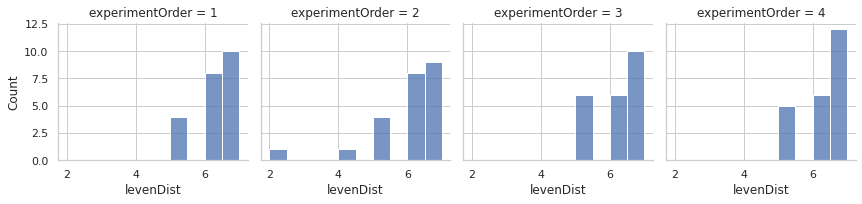

In [ ]:
sns.displot(
    expDf, x="levenDist", col="experimentOrder",
    binwidth=0.5, height=3, facet_kws=dict(margin_titles=True),
)

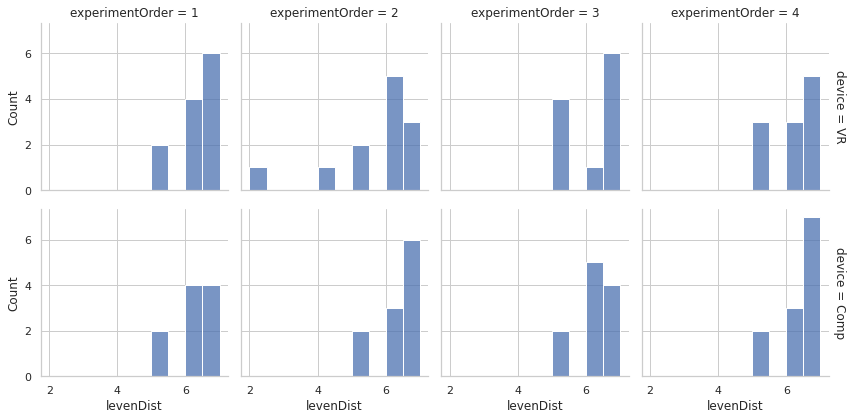

In [ ]:
sns.displot(
    expDf, x="levenDist", col="experimentOrder", row='device',
    binwidth=0.5, height=3, facet_kws=dict(margin_titles=True),
)

# Comparing the VR vs VR (1st vs 2nd) and same for Comp

In [ ]:
expDf["sequenceOrder"] = (expDf["experimentOrder"] == 2) | (expDf["experimentOrder"] == 4)

Text(0.5, 0.98, 'Results of the experiments vs experience of the participant with 3d softwares')

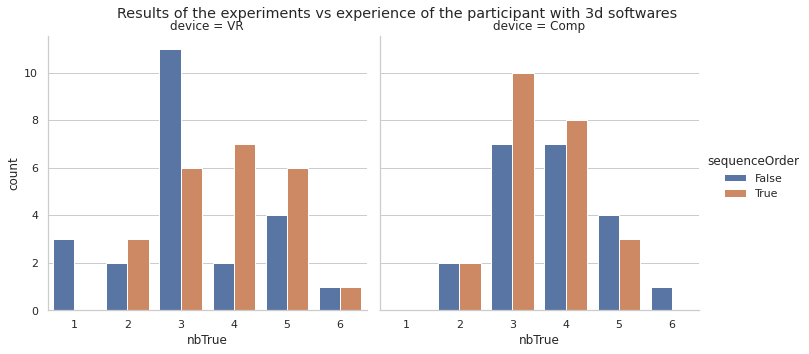

In [ ]:
rp = sns.catplot(x="nbTrue", col="device",
          data=expDf, hue="sequenceOrder",
          kind="count")


rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Results of the experiments vs experience of the participant with 3d softwares')

-------------------

Controlling if the two datasets are equally difficult

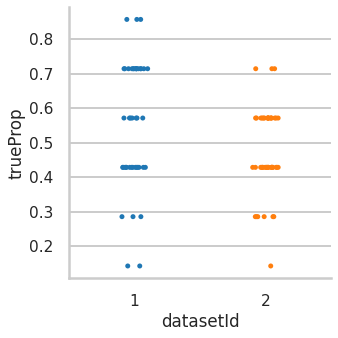

In [12]:
sns.catplot(data = expDf, x="datasetId",y="trueProp")

In [18]:
import scipy.stats as stats
U1, p = stats.mannwhitneyu(
    expDf.query("datasetId == 1")["veracityScore"],
     expDf.query("datasetId == 2")["veracityScore"],alternative="greater")

print(p)

0.005344026111017651


dataset 1 is significantly associated with higher veracity scores

--------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


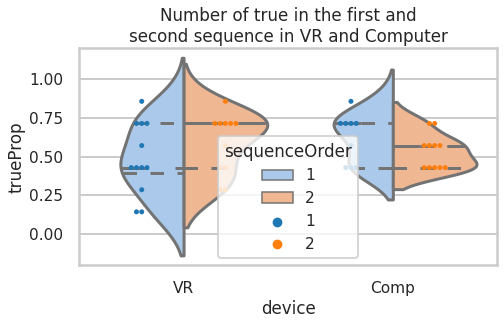

In [11]:
sns.set_context("poster", 0.7)
sns.set_style("whitegrid")

plt.figure(figsize = (7.5,4))
#sns.set_theme(style="whitegrid")
ax = sns.violinplot(x='device', y='trueProp', hue='sequenceOrder', split=True, data=expDf.query("datasetId == 1"),inner='quartiles',palette="pastel")

ax = sns.swarmplot(x='device', y='trueProp', hue='sequenceOrder',split=True, data=expDf.query("datasetId == 1"),palette="tab10")

ax.set(title='Number of true in the first and\nsecond sequence in VR and Computer')
plt.savefig(os.path.join(path,"plot/nb-true-seq1-2.svg"))

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, 'Veracity scores of the experiments vs experience of the participant with 3d softwares')]

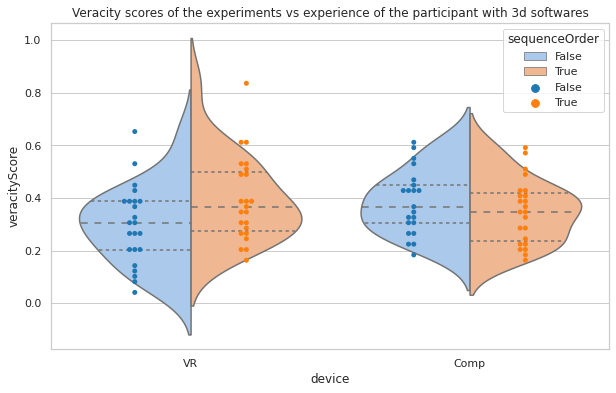

In [ ]:
plt.figure(figsize = (10,6))
#sns.set_theme(style="whitegrid")
ax = sns.violinplot(x='device', y='veracityScore', hue='sequenceOrder', split=True, data=expDf,inner='quartiles',palette="pastel")

ax = sns.swarmplot(x='device', y='veracityScore', hue='sequenceOrder',split=True, data=expDf,palette="tab10")

ax.set(title='Veracity scores of the experiments vs experience of the participant with 3d softwares')

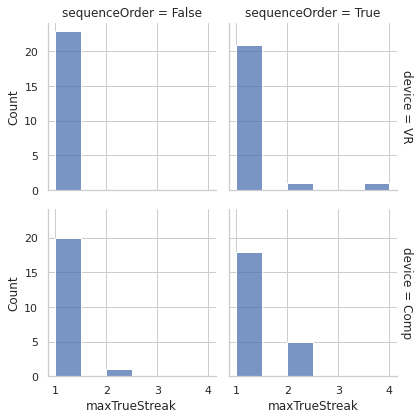

In [ ]:
sns.displot(
    expDf, x="maxTrueStreak", col="sequenceOrder", row='device',
    binwidth=0.5, height=3, facet_kws=dict(margin_titles=True),
)

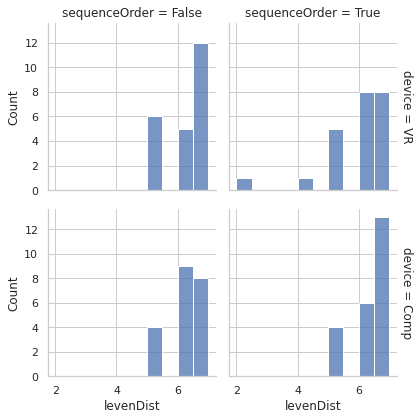

In [ ]:
sns.displot(
    expDf, x="levenDist", col="sequenceOrder", row='device',
    binwidth=0.5, height=3, facet_kws=dict(margin_titles=True),
)

# Compare 1st and 2nd dataset on each platform for scores

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


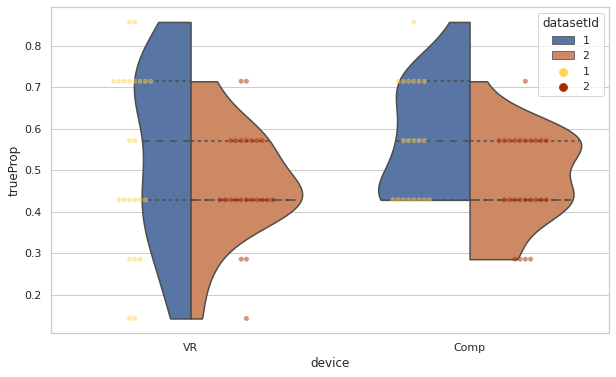

In [ ]:
plt.figure(figsize = (10,6))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x='device', y='trueProp', hue='datasetId', split=True, data=expDf,inner='quartiles', cut=0)
ax = sns.swarmplot(x='device', y='trueProp', hue='datasetId',split=True, data=expDf, palette="afmhot_r", edgecolor="grey", alpha=0.5)

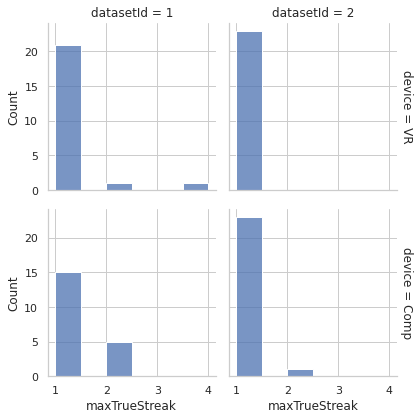

In [ ]:
sns.displot(
    expDf, x="maxTrueStreak", col="datasetId", row='device',
    binwidth=0.5, height=3, facet_kws=dict(margin_titles=True),
)

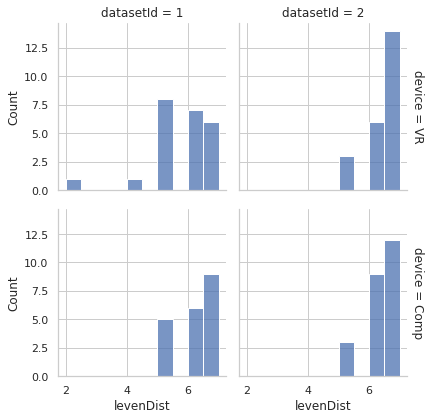

In [ ]:
sns.displot(
    expDf, x="levenDist", col="datasetId", row='device',
    binwidth=0.5, height=3, facet_kws=dict(margin_titles=True),
)

# Compare pause time in VR and comp

the graph hide one point that is very high !

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


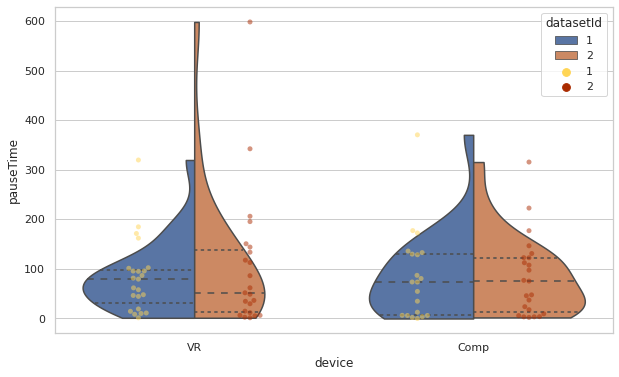

In [ ]:
plt.figure(figsize = (10,6))
sns.set_theme(style="whitegrid")
sns.violinplot(x='device', y='pauseTime', hue='datasetId', split=True, data=expDf[expDf['pauseTime']<1200],inner='quartiles', cut=0)
ax = sns.swarmplot(x='device', y='pauseTime', hue='datasetId',split=True, data=expDf.query("pauseTime < 800"), palette="afmhot_r", edgecolor="grey", alpha=0.5)